In [56]:
import sys

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')
from compute_similarity import compute_similarity
from k_axial_distribution import k_axial_distribution

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib
import os.path
import json
import random

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load configuration file

In [126]:
with open('../config/config_test.json') as config_file:
    config = json.load(config_file)

COMPUTING AXIAL DISTRIBUTION 
 ––– Method: icap 
 ––– Range: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 40] 
 ––– Threshold: 3
...Loading data for the different spinal masks
...Computing distribution for each K
......K = 5
......K = 6
......K = 7
......K = 8
......K = 9
......K = 10
......K = 11
......K = 12
......K = 13
......K = 14
......K = 15
......K = 16
......K = 17
......K = 18
......K = 19
......K = 20
......K = 21
......K = 22
......K = 23
......K = 24
......K = 25
......K = 26
......K = 27
......K = 28
......K = 29
......K = 30
......K = 35
......K = 40
DONE!


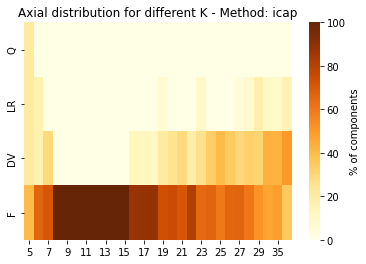

In [140]:
test_ax = k_axial_distribution(config,'icap')

In [130]:
initdf = pd.DataFrame.from_dict(test_ax)
initdf

,5,6,7,8,9,10,11,12,13,14,...,23,24,25,26,27,28,29,30,35,40
Q,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LR,1,1,0,0,0,0,0,0,0,0,...,2,0,0,0,1,2,5,3,3,6
DV,1,1,2,0,0,0,0,0,0,0,...,6,8,10,9,8,9,9,13,15,20
F,2,4,5,8,9,10,11,12,13,14,...,15,16,15,17,18,17,15,14,17,14


In [131]:
res = initdf.div(initdf.sum(axis=0), axis=1).mul(100)

Text(0.5, 15.0, 'K')

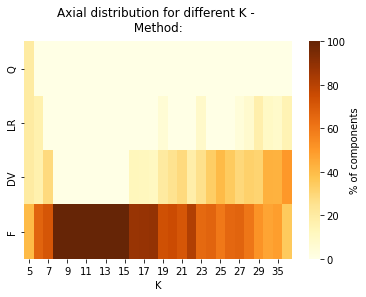

In [144]:
sns.heatmap(res,cmap='YlOrBr',cbar_kws={'label': '% of components'});
plt.title('Axial distribution for different K - \n Method: ',pad=10);
plt.xlabel('K')

## Read ICA/iCAP data

In [22]:
icap_img = nib.load(config['main_dir'] + config['data']['icap']['main_dir'] + config['data']['icap']['sc_dir'] + 'K_9_' + config['data']['icap']['k_dir'] + config['data']['icap']['filename'])
icap_data = icap_img.get_fdata()

In [23]:
icap_data.shape

(61, 56, 298, 9)

In [26]:
np.sum(icap_data[:,:,:,2])

27641.76029698015

In [5]:
test

('rr', 'tt')

In [7]:
test[0]

'rr'

In [32]:
test = dict(zip(('d','a','c'), [0,0,0]))

In [34]:
test['d'] = test['d']+1

In [35]:
test['d']

1